In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr

In [3]:
df=pd.read_csv(r"D:\Cars24_Analysis\agoda\cleaned.csv")

In [4]:
sns.set(style="whitegrid")

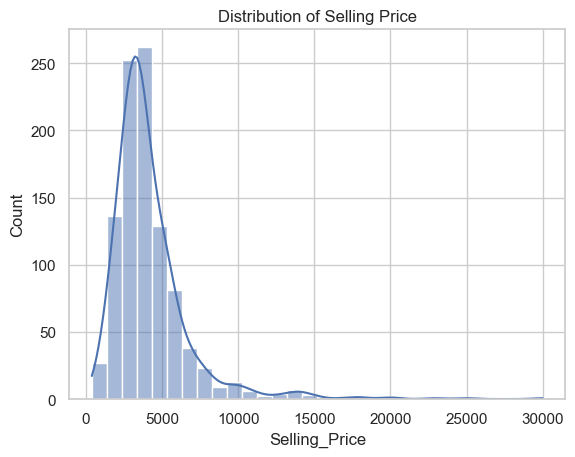

In [5]:
# =====================================================
# Q1. What is the distribution of Selling Price?
# =====================================================
plt.figure()
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

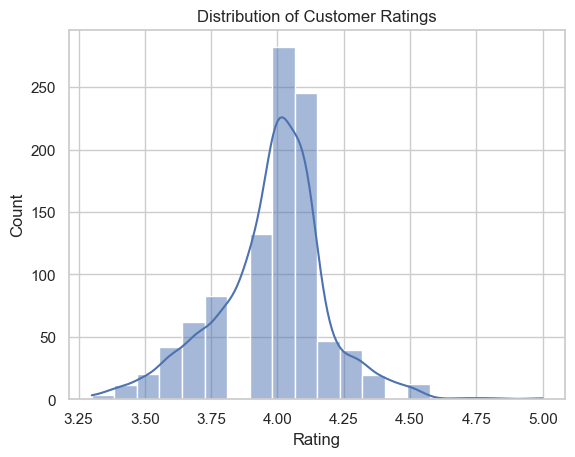

In [6]:
# =====================================================
# Q2. How are customer ratings distributed?
# =====================================================
plt.figure()
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of Customer Ratings")
plt.show()

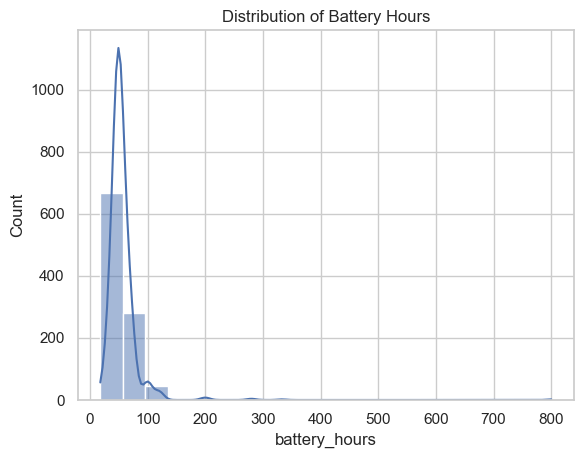

In [7]:
# =====================================================
# Q3. What is the distribution of battery hours?
# =====================================================
plt.figure()
sns.histplot(df["battery_hours"], bins=20, kde=True)
plt.title("Distribution of Battery Hours")
plt.show()

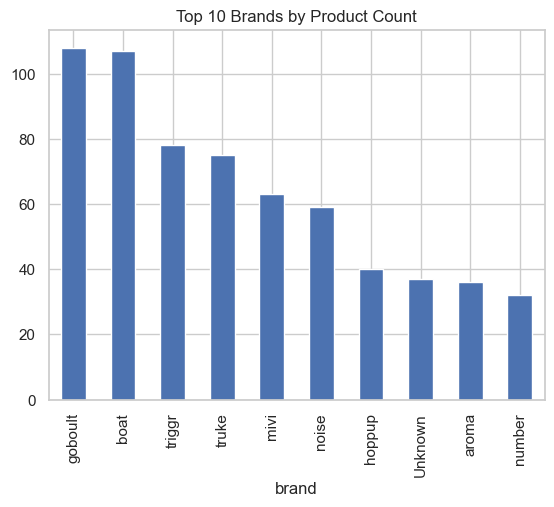

In [8]:
# =====================================================
# Q4. Which brands dominate the Bluetooth earbuds market?
# =====================================================
plt.figure()
df["brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Brands by Product Count")
plt.show()

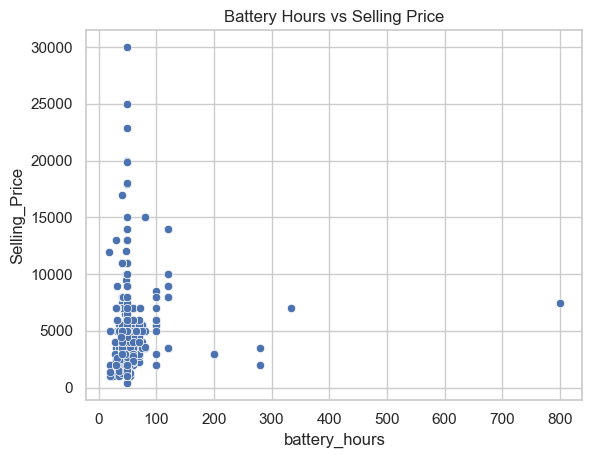

In [9]:
# =====================================================
# Q5. How does battery life vary with selling price?
# =====================================================
plt.figure()
sns.scatterplot(x="battery_hours", y="Selling_Price", data=df)
plt.title("Battery Hours vs Selling Price")
plt.show()

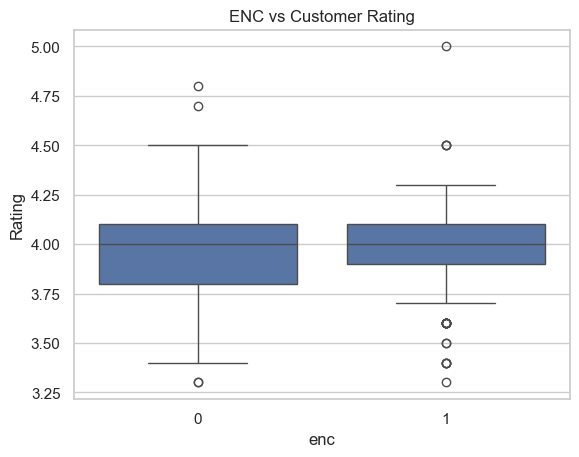

In [10]:
# =====================================================
# Q6. Do ENC-enabled earbuds have higher ratings?
# =====================================================
plt.figure()
sns.boxplot(x="enc", y="Rating", data=df)
plt.title("ENC vs Customer Rating")
plt.show()

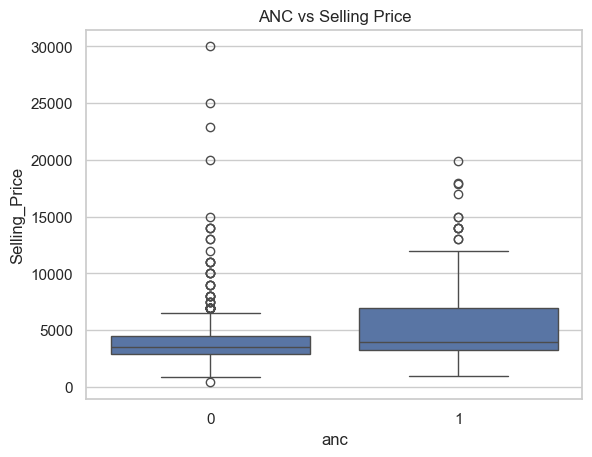

In [11]:
# =====================================================
# Q7. Is there a price premium for ANC-supported earbuds?
# =====================================================
plt.figure()
sns.boxplot(x="anc", y="Selling_Price", data=df)
plt.title("ANC vs Selling Price")
plt.show()

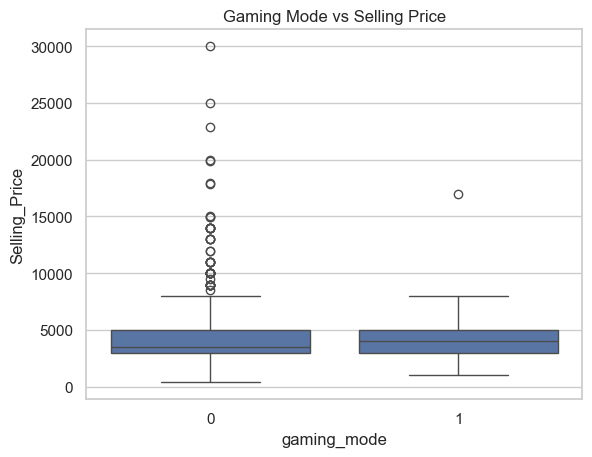

In [12]:
# =====================================================
# Q8. Are gaming earbuds priced higher than non-gaming earbuds?
# =====================================================
plt.figure()
sns.boxplot(x="gaming_mode", y="Selling_Price", data=df)
plt.title("Gaming Mode vs Selling Price")
plt.show()

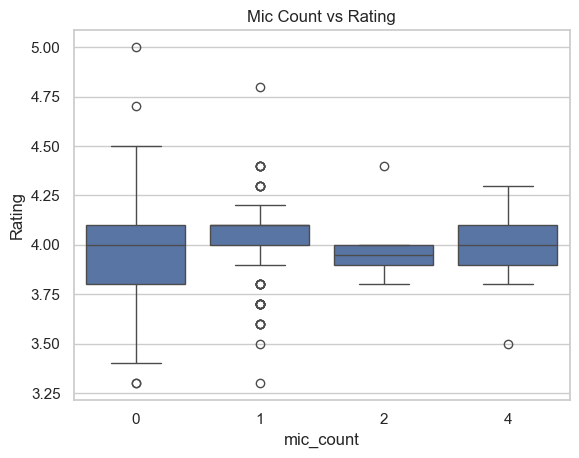

In [13]:
# =====================================================
# Q9. Does mic count influence customer ratings?
# =====================================================
plt.figure()
sns.boxplot(x="mic_count", y="Rating", data=df)
plt.title("Mic Count vs Rating")
plt.show()

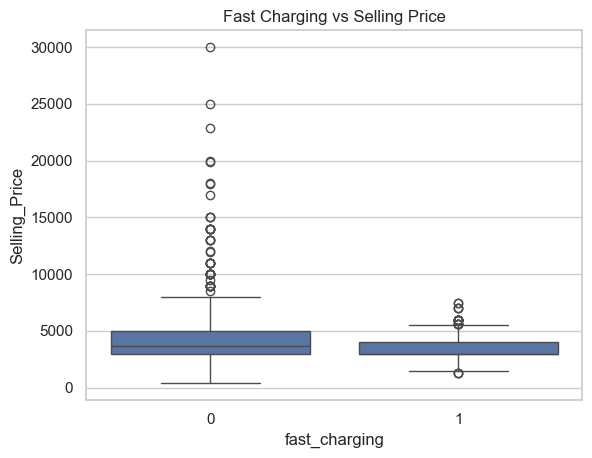

In [14]:
# =====================================================
# Q10. Do fast-charging earbuds cost more?
# =====================================================
plt.figure()
sns.boxplot(x="fast_charging", y="Selling_Price", data=df)
plt.title("Fast Charging vs Selling Price")
plt.show()

In [15]:
# =====================================================
# Q11. What is the correlation between battery hours and price?
# =====================================================
battery_price_corr, _ = pearsonr(
    df["battery_hours"].dropna(),
    df.loc[df["battery_hours"].notna(), "Selling_Price"]
)
print("Correlation between Battery Hours and Price:", round(battery_price_corr, 3))

Correlation between Battery Hours and Price: 0.117


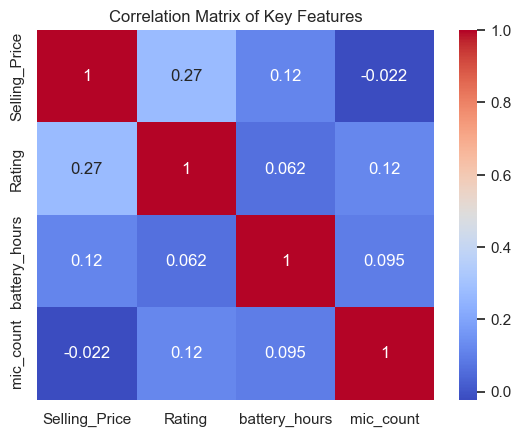

In [16]:
# =====================================================
# Q12. How are price, rating, battery, and mic count correlated?
# =====================================================
corr_features = ["Selling_Price", "Rating", "battery_hours", "mic_count"]
corr_matrix = df[corr_features].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Key Features")
plt.show()

# Advance stats

In [17]:

# =====================================================
# Q13. Is there a statistically significant difference in ratings
#     between ENC and non-ENC earbuds? (t-test)
# =====================================================
enc_rating = df[df["enc"] == 1]["Rating"].dropna()
non_enc_rating = df[df["enc"] == 0]["Rating"].dropna()

t_stat, p_val_enc = ttest_ind(enc_rating, non_enc_rating, equal_var=False)
print("ENC vs Non-ENC Rating p-value:", round(p_val_enc, 4))

if p_val_enc < 0.05:
    print("Reject H0: ENC has a significant impact on ratings")
else:
    print("Fail to Reject H0: ENC has no significant impact on ratings")

ENC vs Non-ENC Rating p-value: 0.1461
Fail to Reject H0: ENC has no significant impact on ratings


In [20]:
# =====================================================
# Q14. Is there a significant price difference between
#     gaming and non-gaming earbuds? (Mann–Whitney U test)
# =====================================================
gaming_price = df[df["gaming_mode"] == 1]["Selling_Price"].dropna()
nongaming_price = df[df["gaming_mode"] == 0]["Selling_Price"].dropna()

u_stat, p_val_game = mannwhitneyu(gaming_price, nongaming_price)
print("Gaming vs Non-Gaming Price p-value:", round(p_val_game, 4))

if p_val_game < 0.05:
    print("Reject H0: Gaming mode significantly impacts price")
else:
    print("Fail to Reject H0: Gaming mode does not significantly impact price")


Gaming vs Non-Gaming Price p-value: 0.1042
Fail to Reject H0: Gaming mode does not significantly impact price
